In [3]:
import numpy as np
import pandas as pd
import sys
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [4]:

plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [5]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Opx-Liq')
myOpxs1=out['Opxs']
myLiquids1=out['Liqs']
Opx_Glass=out['my_input']
notinLEPR= Opx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Opx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Opx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)



mask_1GPa=Opx_Glass['P_kbar_x']<20
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new1=Press_new.fillna(False)

Eq_tests=pt.calculate_orthopyroxene_liquid_components(liq_comps=myLiquids1, opx_comps=myOpxs1,
                                                      Fe3Fet_Liq=0)


#Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new]
KdFilt=np.abs(Eq_tests['Ideal_Kd']-Eq_tests['Kd_Fe_Mg_Fet'])<=0.12


C:\Users\penny\AppData\Local\Temp\ipykernel_22656\623212662.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Opx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Opx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


In [6]:
Eq_tests.columns[Eq_tests.columns.str.contains('Kd')]

Index(['Kd Eq (Put2008+-0.06)', 'Kd_Fe_Mg_Fet', 'Kd_Fe_Mg_Fe2', 'Ideal_Kd',
       'Delta_Kd_Fe_Mg_Fe2'],
      dtype='object')

## Quant water contents

In [7]:
Test_input_All=out['my_input'].loc[Press_new1]
VBD_cal_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD_GSC')
VBD_cal_mask=VBD_cal_mask.fillna(False)

VBD_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD')
VBD_mask=VBD_mask.fillna(False)
FTIR_mask=Test_input_All['H2O_Liq_Method'].str.contains('FTIR')
FTIR_mask=FTIR_mask.fillna(False)
SIMS_mask=Test_input_All['H2O_Liq_Method'].str.contains('SIMS')
SIMS_mask=SIMS_mask.fillna(False)
Raman_mask=Test_input_All['H2O_Liq_Method'].str.contains('Raman')
Raman_mask=Raman_mask.fillna(False)
Sol_mask=Test_input_All['H2O_Liq_Method'].str.contains('Sol')
Sol_mask=Sol_mask.fillna(False)
balance_mask=Test_input_All['H2O_Liq_Method'].str.contains('balance')
balance_mask=balance_mask.fillna(False)

added_mask=Test_input_All['H2O_Liq_Method'].str.contains('added')
added_mask=added_mask.fillna(False)
Quantmethod1=FTIR_mask|SIMS_mask|Raman_mask

nonzero=Test_input_All['H2O_Liq']>0
Quantmethod=(VBD_cal_mask|FTIR_mask|SIMS_mask|Raman_mask)&nonzero
NonQuantmethod=(VBD_mask&~VBD_cal_mask)|balance_mask|added_mask
NoH2O=Test_input_All['H2O_Liq_Method']==0
NoH2O=NoH2O.fillna(False)



## Which of our barometers is best

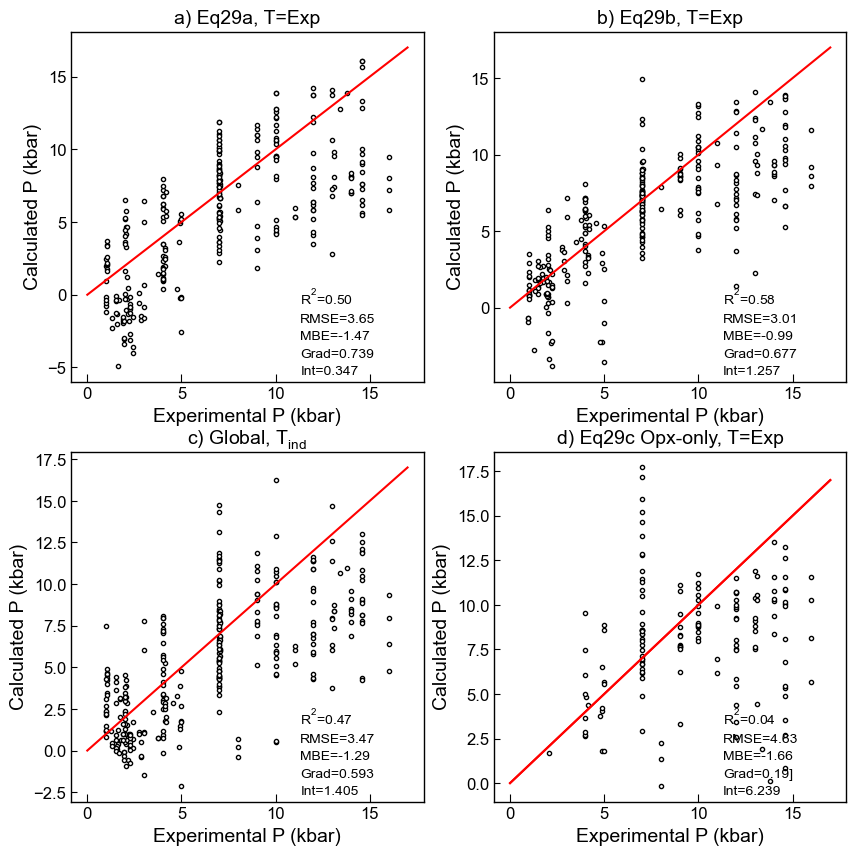

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

#############################################################3
CalcP_29a=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29a",T=Opx_Glass['T_K_x'])


ax1.plot(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29a.loc[Press_new], '.k', mfc='white')
ax1.plot([0,  17], [0,  17], '-r')

stats_29aP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29a.loc[Press_new]) 

ax1.annotate("R$^{2}$="+str(stats_29aP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax1.annotate("RMSE="+str(stats_29aP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax1.annotate("MBE="+str(stats_29aP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Grad="+str(np.round(stats_29aP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Int="+str(np.round(stats_29aP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

############################################################333

CalcP_29b=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29b",T=Opx_Glass['T_K_x'])


stats_29bP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29b.loc[Press_new]) 


ax2.plot(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29b.loc[Press_new], '.k', mfc='white')
ax2.plot([0,  17], [0,  17], '-r')


ax2.annotate("R$^{2}$="+str(stats_29bP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax2.annotate("RMSE="+str(stats_29bP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax2.annotate("MBE="+str(stats_29bP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Grad="+str(np.round(stats_29bP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Int="+str(np.round(stats_29bP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)


##################################

CalcP_Glob=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put_Global_Opx",T=Opx_Glass['T_K_x'])


ax3.plot(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_Glob.loc[Press_new], '.k', mfc='white')
ax3.plot([0,  17], [0,  17], '-r')

stats_GlobP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_Glob.loc[Press_new]) 

ax3.annotate("R$^{2}$="+str(stats_GlobP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax3.annotate("RMSE="+str(stats_GlobP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax3.annotate("MBE="+str(stats_GlobP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Grad="+str(np.round(stats_GlobP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Int="+str(np.round(stats_GlobP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

ax1.set_title('a) Eq29a, T=Exp')
ax2.set_title('b) Eq29b, T=Exp')
ax3.set_title('c) Global, T$_{ind}$')
ax4.set_title('d) Eq29c Opx-only, T=Exp')

############################################
CalcP_29c=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29c",T=Opx_Glass['T_K_x'])
CalcP_29cNoCr=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29cnoCr",T=Opx_Glass['T_K_x'])

ax4.plot(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29c.loc[Press_new], '.k', mfc='white')
ax4.plot([0,  17], [0,  17], '-r')

#ax4.plot(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29cNoCr.loc[Press_new], 'oc', mfc='white')
ax4.plot([0,  17], [0,  17], '-r')

stats_29cP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29c.loc[Press_new]) 

ax4.annotate("R$^{2}$="+str(stats_29cP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax4.annotate("RMSE="+str(stats_29cP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax4.annotate("MBE="+str(stats_29cP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Grad="+str(np.round(stats_29cP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Int="+str(np.round(stats_29cP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

ax1.set_xlabel('Experimental P (kbar)')
ax1.set_ylabel('Calculated P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax3.set_ylabel('Calculated P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax4.set_ylabel('Calculated P (kbar)')
fig.savefig('Supporting_Fig_DiffBarometers.png', dpi=200)

## Using only quant water

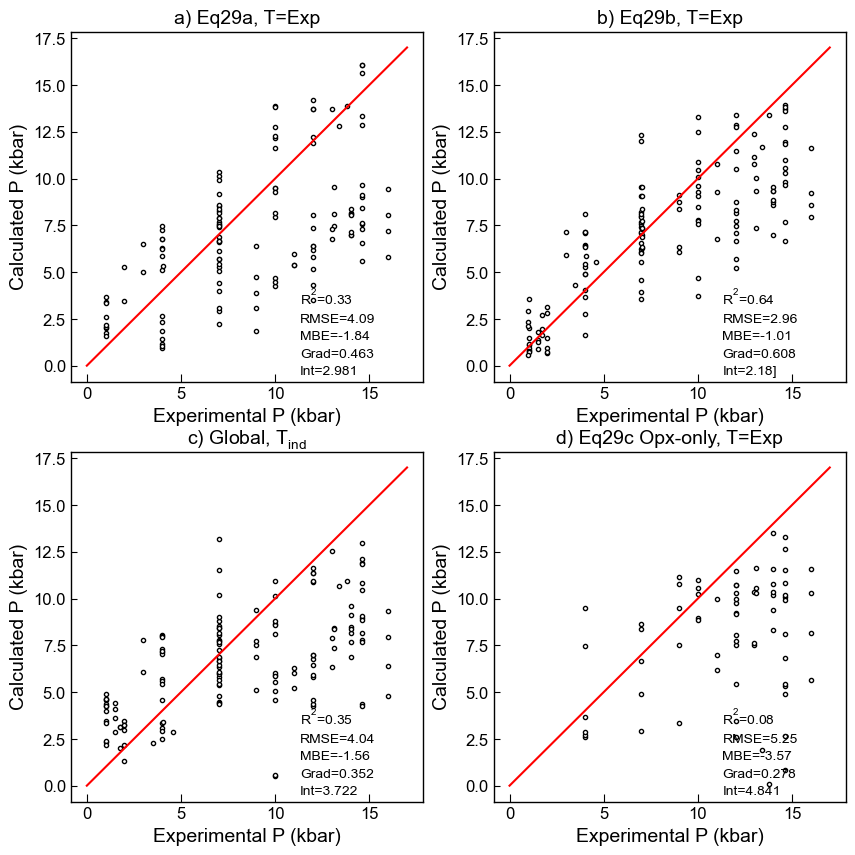

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

#############################################################3
CalcP_29a=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29a",T=Opx_Glass['T_K_x'])


ax1.plot(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29a.loc[Press_new&Quantmethod], '.k', mfc='white')
ax1.plot([0,  17], [0,  17], '-r')

stats_29aP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29a.loc[Press_new&Quantmethod]) 

ax1.annotate("R$^{2}$="+str(stats_29aP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax1.annotate("RMSE="+str(stats_29aP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax1.annotate("MBE="+str(stats_29aP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Grad="+str(np.round(stats_29aP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Int="+str(np.round(stats_29aP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

############################################################333

CalcP_29b=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29b",T=Opx_Glass['T_K_x'])


stats_29bP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29b.loc[Press_new&Quantmethod]) 


ax2.plot(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29b.loc[Press_new&Quantmethod], '.k', mfc='white')
ax2.plot([0,  17], [0,  17], '-r')


ax2.annotate("R$^{2}$="+str(stats_29bP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax2.annotate("RMSE="+str(stats_29bP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax2.annotate("MBE="+str(stats_29bP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Grad="+str(np.round(stats_29bP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Int="+str(np.round(stats_29bP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)


##################################

CalcP_Glob=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put_Global_Opx",T=Opx_Glass['T_K_x'])


ax3.plot(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_Glob.loc[Press_new&Quantmethod], '.k', mfc='white')
ax3.plot([0,  17], [0,  17], '-r')

stats_GlobP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_Glob.loc[Press_new&Quantmethod]) 

ax3.annotate("R$^{2}$="+str(stats_GlobP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax3.annotate("RMSE="+str(stats_GlobP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax3.annotate("MBE="+str(stats_GlobP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Grad="+str(np.round(stats_GlobP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Int="+str(np.round(stats_GlobP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

ax1.set_title('a) Eq29a, T=Exp')
ax2.set_title('b) Eq29b, T=Exp')
ax3.set_title('c) Global, T$_{ind}$')
ax4.set_title('d) Eq29c Opx-only, T=Exp')

############################################
CalcP_29c=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29c",T=Opx_Glass['T_K_x'])


ax4.plot(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29c.loc[Press_new&Quantmethod], '.k', mfc='white')
ax4.plot([0,  17], [0,  17], '-r')

stats_29cP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29c.loc[Press_new&Quantmethod]) 

ax4.annotate("R$^{2}$="+str(stats_29cP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax4.annotate("RMSE="+str(stats_29cP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax4.annotate("MBE="+str(stats_29cP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Grad="+str(np.round(stats_29cP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Int="+str(np.round(stats_29cP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

ax1.set_xlabel('Experimental P (kbar)')
ax1.set_ylabel('Calculated P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax3.set_ylabel('Calculated P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax4.set_ylabel('Calculated P (kbar)')
fig.savefig('Supporting_Fig_DiffBarometers_QuantH2O.png', dpi=200)

## Which of our two thermometers is better

In [10]:
CalcT_28a_ExpP=pt.calculate_opx_liq_temp(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationT="T_Put2008_eq28a",P=Opx_Glass['P_kbar_x'])

CalcT_28b_ExpP=pt.calculate_opx_liq_temp(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationT="T_Put2008_eq28b_opx_sat",P=Opx_Glass['P_kbar_x'])


C:\Users\penny\AppData\Local\Temp\ipykernel_22656\2648817915.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(CalcT_28a_ExpP.loc[Press_new], CalcT_28b_ExpP.loc[Press_new], 'ok', color='red')


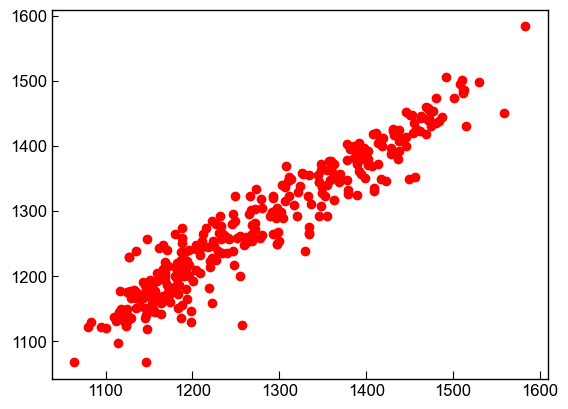

In [11]:
plt.plot(CalcT_28a_ExpP.loc[Press_new], CalcT_28b_ExpP.loc[Press_new], 'ok', color='red')

In [12]:
(sum(Press_new&Quantmethod))

147

In [13]:
sum(Press_new)

324

In [14]:
uni_study=Opx_Glass['Citation_x'].loc[Press_new].unique()
len(uni_study)

23

In [15]:
uni_study=Opx_Glass['Citation_x'].loc[Press_new&Quantmethod].unique()
len(uni_study)

10

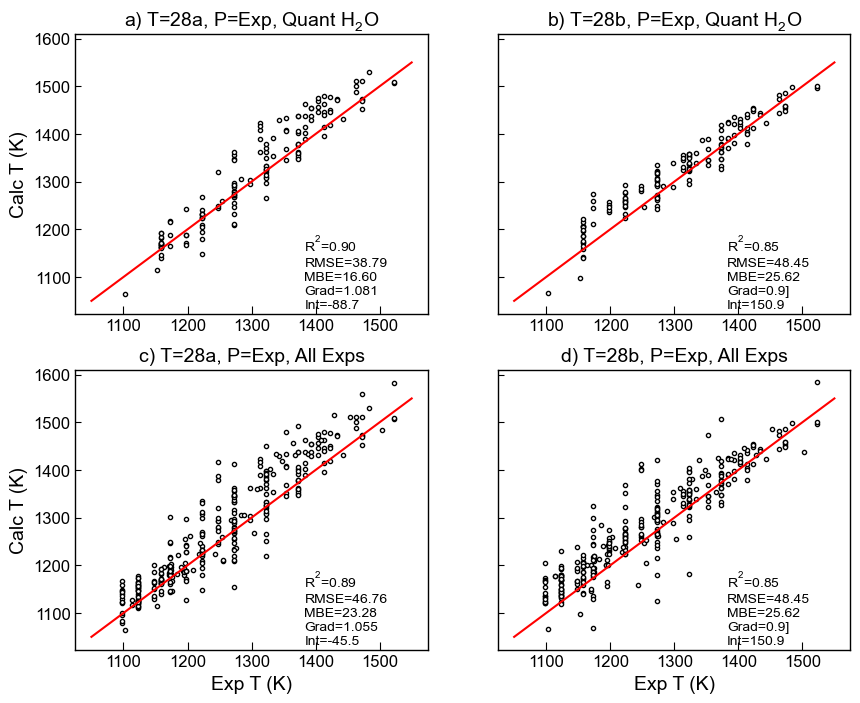

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8), sharey=True)
ax1.plot(Opx_Glass['T_K_x'].loc[Press_new&Quantmethod], CalcT_28a_ExpP.loc[Press_new&Quantmethod], '.k', mfc='white')
ax2.plot(Opx_Glass['T_K_x'].loc[Press_new&Quantmethod], CalcT_28b_ExpP.loc[Press_new&Quantmethod], '.k', mfc='white')
ax1.plot([1050, 1550], [1050, 1550], '-r')
ax2.plot([1050, 1550], [1050, 1550], '-r')


stats_28aP=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new&Quantmethod],
                           CalcT_28a_ExpP.loc[Press_new&Quantmethod]) 

ax1.annotate("R$^{2}$="+str(stats_28aP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax1.annotate("RMSE="+str(stats_28aP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax1.annotate("MBE="+str(stats_28aP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Grad="+str(np.round(stats_28aP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Int="+str(np.round(stats_28aP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

stats_28bP=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new], CalcT_28b_ExpP.loc[Press_new]) 

ax2.annotate("R$^{2}$="+str(stats_28bP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax2.annotate("RMSE="+str(stats_28bP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax2.annotate("MBE="+str(stats_28bP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Grad="+str(np.round(stats_28bP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Int="+str(np.round(stats_28bP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

ax1.set_title('a) T=28a, P=Exp, Quant H$_2$O')
ax2.set_title('b) T=28b, P=Exp, Quant H$_2$O')

ax3.plot(Opx_Glass['T_K_x'].loc[Press_new], CalcT_28a_ExpP.loc[Press_new], '.k', mfc='white')
ax4.plot(Opx_Glass['T_K_x'].loc[Press_new], CalcT_28b_ExpP.loc[Press_new], '.k', mfc='white')
ax3.plot([1050, 1550], [1050, 1550], '-r')
ax4.plot([1050, 1550], [1050, 1550], '-r')


stats_28aP=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new],
                           CalcT_28a_ExpP.loc[Press_new]) 

ax3.annotate("R$^{2}$="+str(stats_28aP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax3.annotate("RMSE="+str(stats_28aP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax3.annotate("MBE="+str(stats_28aP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Grad="+str(np.round(stats_28aP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Int="+str(np.round(stats_28aP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

stats_28bP=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new], CalcT_28b_ExpP.loc[Press_new]) 

ax4.annotate("R$^{2}$="+str(stats_28bP['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax4.annotate("RMSE="+str(stats_28bP['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax4.annotate("MBE="+str(stats_28bP['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Grad="+str(np.round(stats_28bP['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Int="+str(np.round(stats_28bP['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)

ax3.set_title('c) T=28a, P=Exp, All Exps')
ax4.set_title('d) T=28b, P=Exp, All Exps')
ax1.set_ylabel('Calc T (K)')
ax3.set_ylabel('Calc T (K)')
ax3.set_xlabel('Exp T (K)')
ax4.set_xlabel('Exp T (K)')
fig.savefig('Supporting_Fig_DiffThermometers.png', dpi=200)

## Simpler plots for review

In [17]:
Put_28a_GlobalP=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1,
                                         
            opx_comps=myOpxs1, equationT="T_Put2008_eq28a",equationP="P_Put_Global_Opx").T_K_calc

Put_28a_GlobalPkbar=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1,
                                         
            opx_comps=myOpxs1, equationT="T_Put2008_eq28a",equationP="P_Put_Global_Opx").P_kbar_calc

Out_Global_FixedT=pt.calculate_opx_liq_press(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put_Global_Opx")


Opx_only29c_with28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put2008_eq29c", equationT="T_Put2008_eq28a")

Opx_only29b_with28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put2008_eq29b", equationT="T_Put2008_eq28a")

Opx_only29b_with28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put2008_eq29a", equationT="T_Put2008_eq28a")

In [18]:
len(Put_28a_GlobalPkbar)

491

In [19]:
# EQ29c uses Cr log, What percentage are giving Nans because of zero Cr contents
100*sum(Opx_Glass['Cr2O3_Opx'].loc[Press_new]==0)/sum(Opx_Glass['P_kbar_x'].loc[Press_new])

8.016502809970671

In [20]:
## EQ28a uses ln of FM2Si2O6 term
100*sum(Eq_tests['ln_Fm2Si2O6_liq']>0)/len(Eq_tests['ln_Fm2Si2O6_liq'])

100.0

In [21]:
## Eq28b uses ln_FmAl2SiO6_liq
100*sum(Eq_tests['ln_FmAl2SiO6_liq']>0)/len(Eq_tests['ln_FmAl2SiO6_liq'])

91.44602851323829

## How is the FmAl2SiO6 term even calculated
    opx_calc['FmAl2SiO6'] = opx_calc['Al_VI_Opx_cat_6ox'] - \
        opx_calc['NaAlSi2O6'] - opx_calc['CrAl2SiO6']
    opx_calc.FmAl2SiO6[opx_calc.FmAl2SiO6 < 0] = 0
    
    opx_calc['NaAlSi2O6'] = opx_calc['Na_Opx_cat_6ox']
    opx_calc['FmTiAlSiO6'] = opx_calc['Ti_Opx_cat_6ox']
    opx_calc['CrAl2SiO6'] = opx_calc['Cr_Opx_cat_6ox']    

In [22]:
FmAl_neg=~(Eq_tests['ln_FmAl2SiO6_liq']>-100)
FmAlOpx_neg=Eq_tests['FmAl2SiO6']<0
CrNeg=Eq_tests['Cr2O3_Opx']==0
AlVINeg=Eq_tests['Al_VI_Opx_cat_6ox']==0
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&FmAl_neg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&FmAlOpx_neg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&CrNeg&FmAl_neg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&AlVINeg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))


0.07098765432098765
0.0
0.05555555555555555
0.06172839506172839


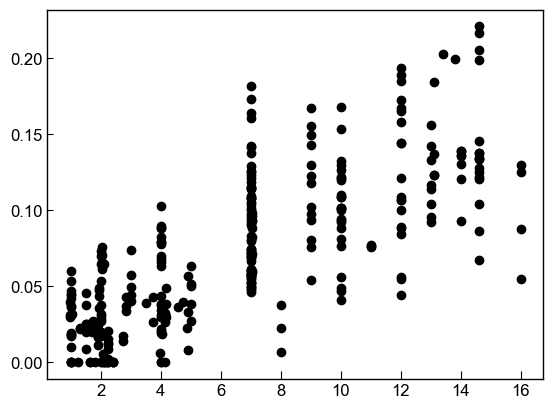

In [23]:
plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new], Eq_tests['Al_VI_Opx_cat_6ox'].loc[Press_new], 'ok')

In [24]:
plot2=Eq_tests['ln_FmAl2SiO6_liq'].replace([np.inf, -np.inf], -0.02)
plot2

0      5.053363
1      2.409940
2      2.563982
3      3.320994
4     -0.020000
         ...   
486    4.678615
487    5.070503
488    4.704473
489    4.803761
490    5.112844
Name: ln_FmAl2SiO6_liq, Length: 491, dtype: float64

Text(0, 0.5, 'Al VI')

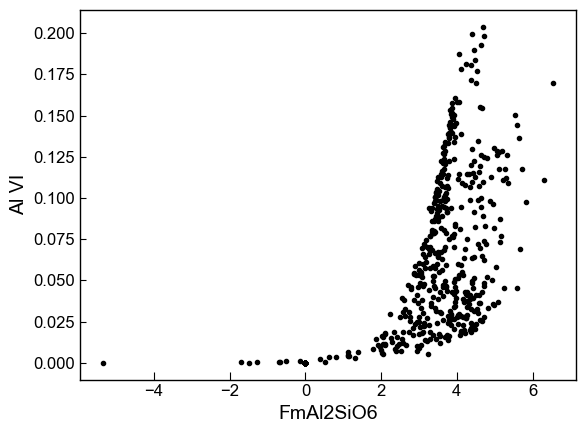

In [25]:
plt.plot(plot2, Eq_tests['FmAl2SiO6'], '.k')
plt.xlabel('FmAl2SiO6')
plt.ylabel('Al VI')
# plt.xlim([-0.03, 0.01])
# plt.ylim([-0.01, 0.05])

Proportion with neg Al2
0.07098765432098765


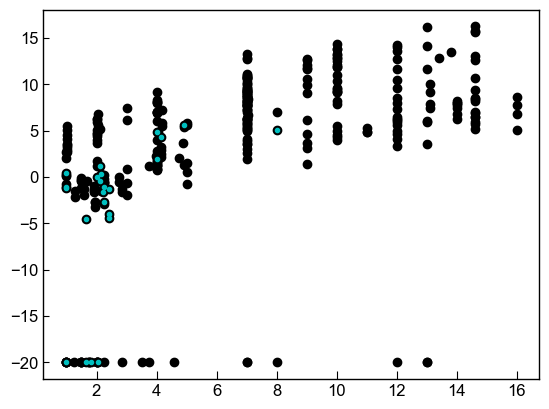

In [26]:
test_log=Opx_only29b_with28a.copy()
test_log=test_log.fillna(-20)
# Working out what is going wrong
NoCr=Opx_Glass['Cr2O3_Opx']==0
FmSi_neg=~(Eq_tests['ln_Fm2Si2O6_liq']>-100)
FmAl_neg=~(Eq_tests['ln_FmAl2SiO6_liq']>-100)
print('Proportion with neg Al2')
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&FmAl_neg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))

plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new], 
         test_log['P_kbar_calc'].loc[Press_new], 'ok')

# plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&NoCr], 
#          test_log['P_kbar_calc'].loc[Press_new&NoCr], 'or', label='NoCr')
# plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&FmSi_neg], 
#          test_log['P_kbar_calc'].loc[Press_new&FmSi_neg], 'oc', label='NoCr')
plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&FmAl_neg], 
         test_log['P_kbar_calc'].loc[Press_new&FmAl_neg], '.c', label='NoCr')


## Evaluating numerical errors for 28a

In [27]:
CalcT=pt.calculate_opx_liq_temp(opx_comps=myOpxs1, liq_comps=myLiquids1,
                                equationT="T_Put2008_eq28a", P=Opx_Glass['P_kbar_x'])

test_log=CalcT.copy()
test_log=test_log.fillna(-20)
# Working out what is going wrong
NoCr=Opx_Glass['Cr2O3_Opx']==0
FmSi_neg=Eq_tests['ln_Fm2Si2O6_liq']<0
FmAl_neg=Eq_tests['ln_FmAl2SiO6_liq']<0
print('Proportion with no Cr')
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&NoCr])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))



Proportion with no Cr
0.5308641975308642


In [28]:
sum(CalcT>-100)/len(CalcT)

1.0

## Evaluating numerical errors for 29c

Proportion with no Cr
0.5308641975308642


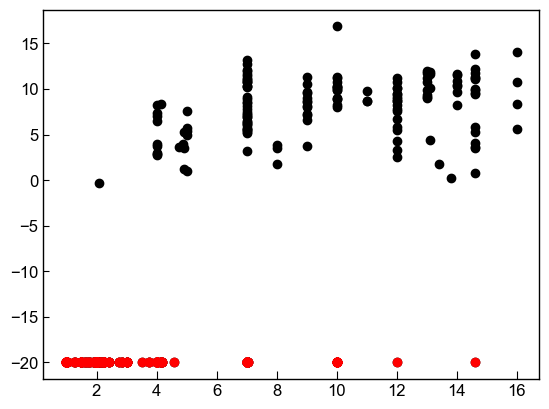

In [29]:
test_log=Opx_only29c_with28a.copy()
test_log=test_log.fillna(-20)
# Working out what is going wrong
NoCr=Opx_Glass['Cr2O3_Opx']==0
FmSi_neg=Eq_tests['ln_Fm2Si2O6_liq']<0
FmAl_neg=Eq_tests['ln_FmAl2SiO6_liq']<0
print('Proportion with no Cr')
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&NoCr])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))

plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new], 
         test_log['P_kbar_calc'].loc[Press_new], 'ok')

plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&NoCr], 
         test_log['P_kbar_calc'].loc[Press_new&NoCr], 'or', label='NoCr')
plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&FmSi_neg], 
         test_log['P_kbar_calc'].loc[Press_new&FmSi_neg], '.c', label='NoCr')
# plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&FmAl_neg], 
#          test_log['P_kbar_calc'].loc[Press_new&FmAl_neg], '.c', label='NoCr')


c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\orthopyroxene_thermobarometry.py:234: UserWarning: The selected barometer uses the log of Cr2O3 component of Opx, which is zero for some of your compositions. This means the function will return infinity.
  w.warn('The selected barometer uses the log of Cr2O3 component of '


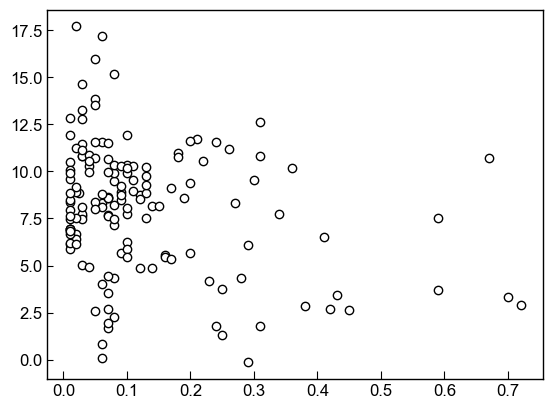

In [30]:
Opx_only29c=pt.calculate_opx_only_press( opx_comps=myOpxs1, 
                                equationP="P_Put2008_eq29c", T=Opx_Glass['T_K_x'])
plt.plot(Opx_Glass['Cr2O3_Opx'].loc[Press_new],
         Opx_only29c.loc[Press_new], 'ok', mfc='white')


In [31]:
## With KD filt

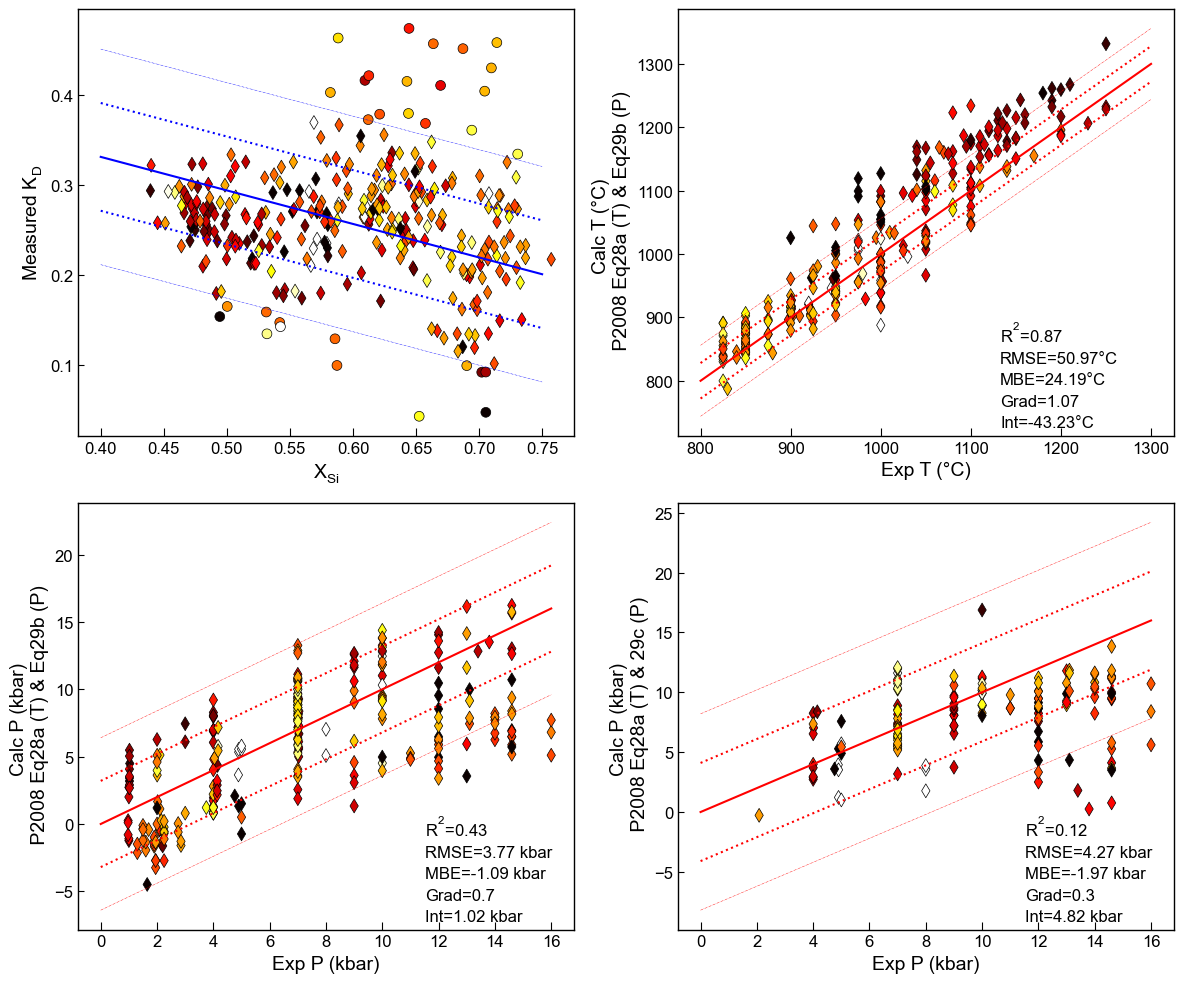

In [32]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure 
s=ax0.scatter(Eq_tests['Si_Liq_cat_frac'].loc[Press_new&(~KdFilt)], 
         Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new&(~KdFilt)],
              marker='o', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&(~KdFilt)], cmap='hot',
vmin = 0, vmax = 10)
s=ax0.scatter(Eq_tests['Si_Liq_cat_frac'].loc[Press_new&KdFilt], 
         Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new&KdFilt],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&KdFilt], cmap='hot',
vmin = 0, vmax = 10)

# ax0.plot(Eq_tests['Si_Liq_cat_frac'].loc[Press_new&KdFilt], 
#          Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new&KdFilt], 'ok', mfc='white')
# ax0.plot(Eq_tests2['Si_Liq_cat_frac'].loc[Press_new&KdFilt2], 
#          Eq_tests2['Kd_Fe_Mg_Fet'].loc[Press_new&KdFilt2], 'ok', mfc='blue')

#ax0.plot(Eq_tests['Si_Liq_cat_frac'].loc[SomeFe3], Eq_tests['Kd_Fe_Mg_Fe2'].loc[SomeFe3], '.r', mfc='red')
linspace_Si=np.linspace(0.4, 0.75, 50)
Linspace_Kd=0.4805 - 0.3733 *linspace_Si
ax0.plot(linspace_Si, Linspace_Kd-0.06, ':b')
ax0.plot(linspace_Si, Linspace_Kd-0.12, '-.b', lw=0.3)
ax0.plot(linspace_Si, Linspace_Kd, '-b')
ax0.plot(linspace_Si, Linspace_Kd+0.06, ':b')
ax0.plot(linspace_Si, Linspace_Kd+0.12, '-.b', lw=0.3)
ax0.set_xlabel('X$_{Si}$')
ax0.set_ylabel('Measured K$_{D}$')


## Plotting temperature
# ax1.plot(Opx_Glass['T_K_x'].loc[Press_new&KdFilt]-273.15, 
#          Put_28a_GlobalP.loc[Press_new&KdFilt]-273.15, 'ok', mfc='white')
s=ax1.scatter(Opx_Glass['T_K_x'].loc[Press_new&KdFilt]-273.15, 
         Opx_only29b_with28a['T_K_calc'].loc[Press_new&KdFilt]-273.15, marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&KdFilt], cmap='hot',
vmin = 0, vmax = 10)
#fig.colorbar(s, ax=ax1)
ax1.plot([800, 1300], [800, 1300], '-r')
ax1.plot([800, 1300], [800+28, 1300+28], ':r')
ax1.plot([800, 1300], [800-28, 1300-28], ':r')
ax1.plot([800, 1300], [800+2*28, 1300+2*28],  '-.r', lw=0.3)
ax1.plot([800, 1300], [800-2*28, 1300-2*28],  '-.r', lw=0.3)



Stats_28aGlob=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new&KdFilt]-273.15, 
         Opx_only29b_with28a['T_K_calc'].loc[Press_new&KdFilt]-273.15)

# ax1.annotate("Cpx Mg#>0.68", xy=(0.65, 0.24),
# xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_28aGlob['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_28aGlob['RMSE'])+"°C", xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MBE="+str(Stats_28aGlob['Mean'])+"°C", xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_28aGlob['Grad'][0], 2)), xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_28aGlob['Int'][0], 2))+"°C", xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=12)



#ax2.plot(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt], Out_Global_FixedT.loc[Press_new&KdFilt], 'ok', mfc='white')

s=ax2.scatter(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt], Opx_only29b_with28a['P_kbar_calc'].loc[Press_new&KdFilt],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&KdFilt], cmap='hot',
vmin = 0, vmax = 10)
#fig.colorbar(s, ax=ax2)

ax2.plot([0, 16], [0, 16], '-r')
ax2.plot([0, 16], [0+3.2, 16+3.2], ':r')
ax2.plot([0, 16], [0-3.2, 16-3.2], ':r')
ax2.plot([0, 16], [0+2*3.2, 16+2*3.2], '-.r', lw=0.3)
ax2.plot([0, 16], [0-2*3.2, 16-2*3.2],  '-.r', lw=0.3)
stats_global=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt],
                             Opx_only29b_with28a['P_kbar_calc'].loc[Press_new&KdFilt])

xcord=0.7
ax2.annotate("R$^{2}$="+str(stats_global['R2']), xy=(xcord, 0.22),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(stats_global['RMSE'])+" kbar", xy=(xcord, 0.17),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MBE="+str(stats_global['Mean'])+" kbar", xy=(xcord, 0.12),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(stats_global['Grad'][0], 2)), xy=(xcord, 0.07),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(stats_global['Int'][0], 2))+" kbar", xy=(xcord, 0.02),
xycoords="axes fraction", fontsize=12)

ax2.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Calc P (kbar) \n P2008 Eq28a (T) & Eq29b (P)')


############### Opx-only pressure
# ax3.plot(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt],
#          Opx_only29c_with28a['P_kbar_calc'].loc[Press_new&KdFilt], 'ok', mfc='white')

s=ax3.scatter(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt],
         Opx_only29c_with28a['P_kbar_calc'].loc[Press_new&KdFilt],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&KdFilt], cmap='hot',
vmin = 0, vmax = 10)


ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) \n P2008 Eq28a (T) & Eq29b (P)')

ax3.set_xlabel('Exp P (kbar)')
ax3.set_ylabel('Calc P (kbar) \n P2008 Eq28a (T) & 29c (P)')


ax3.plot([0, 16], [0, 16], '-r')
ax3.plot([0, 16], [0+4.1, 16+4.1], ':r')
ax3.plot([0, 16], [0-4.1, 16-4.1], ':r')
ax3.plot([0, 16], [0+2*4.1, 16+2*4.1], '-.r', lw=0.3)
ax3.plot([0, 16], [0-2*4.1, 16-2*4.1],  '-.r', lw=0.3)


stats_opxonly=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt],
         Opx_only29c_with28a['P_kbar_calc'].loc[Press_new&KdFilt])

xcord=0.7
ax3.annotate("R$^{2}$="+str(stats_opxonly['R2']), xy=(xcord, 0.22),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(stats_opxonly['RMSE'])+" kbar", xy=(xcord, 0.17),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MBE="+str(stats_opxonly['Mean'])+" kbar", xy=(xcord, 0.12),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(np.round(stats_opxonly['Grad'][0], 2)), xy=(xcord, 0.07),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(np.round(stats_opxonly['Int'][0], 2))+" kbar", xy=(xcord, 0.02),
xycoords="axes fraction", fontsize=12)

#fig.colorbar(s, ax=ax3)
fig.tight_layout()
fig.savefig('Opx_LiqKdFilt.png', dpi=200, transparent=True)

In [33]:
str(np.round(stats_opxonly['Int'], 2))

'[4.82]'

## Supp fig - where H2O contents known
Quantmethod

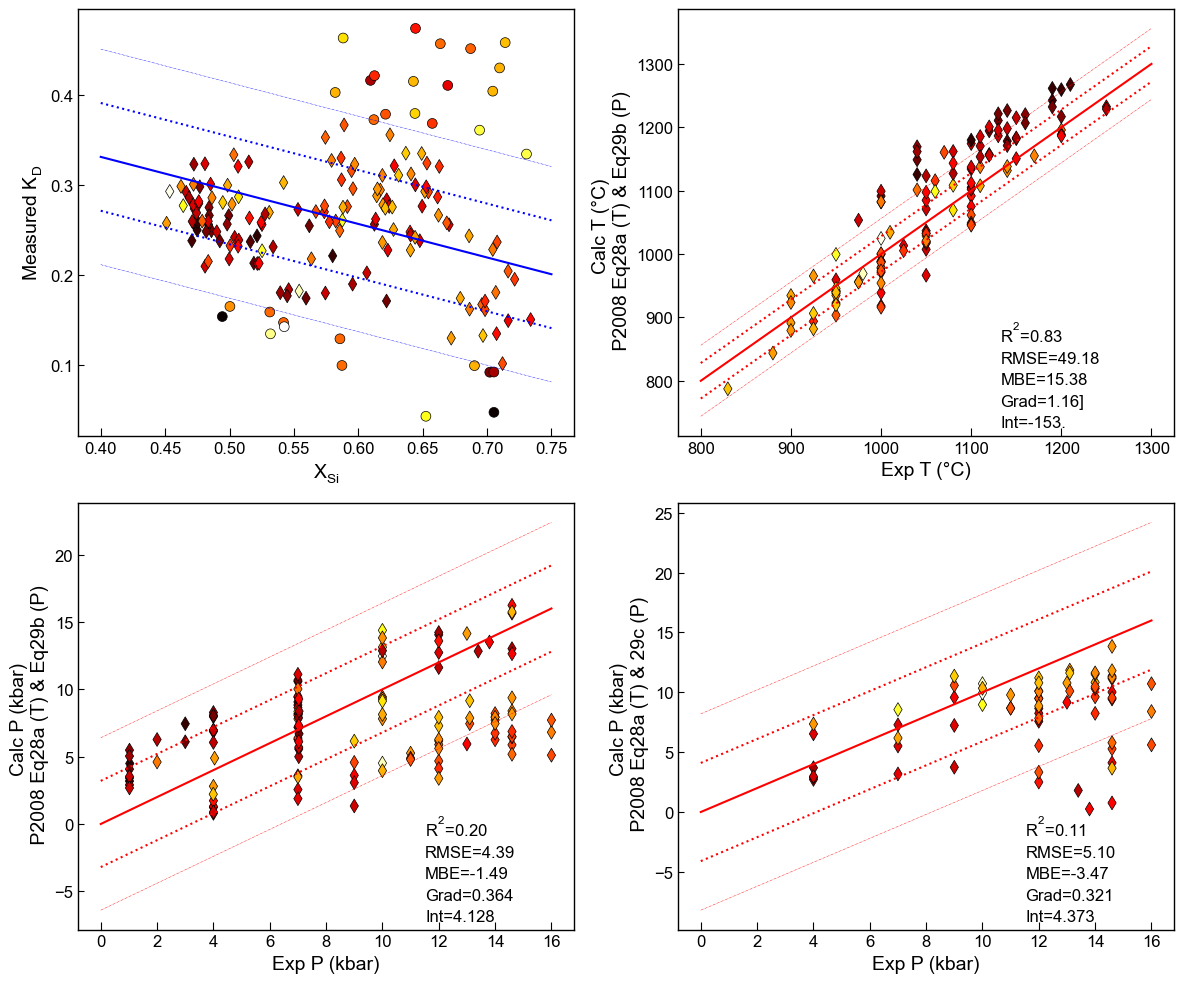

In [34]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure 
s=ax0.scatter(Eq_tests['Si_Liq_cat_frac'].loc[Press_new&(~KdFilt)], 
         Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new&(~KdFilt)],
              marker='o', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&(~KdFilt)], cmap='hot',
vmin = 0, vmax = 10)
s=ax0.scatter(Eq_tests['Si_Liq_cat_frac'].loc[Press_new&KdFilt&Quantmethod], 
         Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new&KdFilt&Quantmethod],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&KdFilt&Quantmethod], cmap='hot',
vmin = 0, vmax = 10)

# ax0.plot(Eq_tests['Si_Liq_cat_frac'].loc[Press_new&KdFilt&Quantmethod], 
#          Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new&KdFilt&Quantmethod], 'ok', mfc='white')
# ax0.plot(Eq_tests2['Si_Liq_cat_frac'].loc[Press_new&KdFilt&Quantmethod2], 
#          Eq_tests2['Kd_Fe_Mg_Fet'].loc[Press_new&KdFilt&Quantmethod2], 'ok', mfc='blue')

#ax0.plot(Eq_tests['Si_Liq_cat_frac'].loc[SomeFe3], Eq_tests['Kd_Fe_Mg_Fe2'].loc[SomeFe3], '.r', mfc='red')
linspace_Si=np.linspace(0.4, 0.75, 50)
Linspace_Kd=0.4805 - 0.3733 *linspace_Si
ax0.plot(linspace_Si, Linspace_Kd-0.06, ':b')
ax0.plot(linspace_Si, Linspace_Kd-0.12, '-.b', lw=0.3)
ax0.plot(linspace_Si, Linspace_Kd, '-b')
ax0.plot(linspace_Si, Linspace_Kd+0.06, ':b')
ax0.plot(linspace_Si, Linspace_Kd+0.12, '-.b', lw=0.3)
ax0.set_xlabel('X$_{Si}$')
ax0.set_ylabel('Measured K$_{D}$')


## Plotting temperature
# ax1.plot(Opx_Glass['T_K_x'].loc[Press_new&KdFilt&Quantmethod]-273.15, 
#          Put_28a_GlobalP.loc[Press_new&KdFilt&Quantmethod]-273.15, 'ok', mfc='white')
s=ax1.scatter(Opx_Glass['T_K_x'].loc[Press_new&KdFilt&Quantmethod]-273.15, 
         Opx_only29b_with28a['T_K_calc'].loc[Press_new&KdFilt&Quantmethod]-273.15, marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&KdFilt&Quantmethod], cmap='hot',
vmin = 0, vmax = 10)
#fig.colorbar(s, ax=ax1)
ax1.plot([800, 1300], [800, 1300], '-r')
ax1.plot([800, 1300], [800+28, 1300+28], ':r')
ax1.plot([800, 1300], [800-28, 1300-28], ':r')
ax1.plot([800, 1300], [800+2*28, 1300+2*28],  '-.r', lw=0.3)
ax1.plot([800, 1300], [800-2*28, 1300-2*28],  '-.r', lw=0.3)



Stats_28aGlob=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new&KdFilt&Quantmethod]-273.15, 
         Opx_only29b_with28a['T_K_calc'].loc[Press_new&KdFilt&Quantmethod]-273.15)

# ax1.annotate("Cpx Mg#>0.68", xy=(0.65, 0.24),
# xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_28aGlob['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_28aGlob['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MBE="+str(Stats_28aGlob['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_28aGlob['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_28aGlob['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=12)



#ax2.plot(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt&Quantmethod], Out_Global_FixedT.loc[Press_new&KdFilt&Quantmethod], 'ok', mfc='white')

s=ax2.scatter(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt&Quantmethod], Opx_only29b_with28a['P_kbar_calc'].loc[Press_new&KdFilt&Quantmethod],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&KdFilt&Quantmethod], cmap='hot',
vmin = 0, vmax = 10)
#fig.colorbar(s, ax=ax2)

ax2.plot([0, 16], [0, 16], '-r')
ax2.plot([0, 16], [0+3.2, 16+3.2], ':r')
ax2.plot([0, 16], [0-3.2, 16-3.2], ':r')
ax2.plot([0, 16], [0+2*3.2, 16+2*3.2], '-.r', lw=0.3)
ax2.plot([0, 16], [0-2*3.2, 16-2*3.2],  '-.r', lw=0.3)
stats_global=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt&Quantmethod],
                             Opx_only29b_with28a['P_kbar_calc'].loc[Press_new&KdFilt&Quantmethod])

xcord=0.7
ax2.annotate("R$^{2}$="+str(stats_global['R2']), xy=(xcord, 0.22),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(stats_global['RMSE']), xy=(xcord, 0.17),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MBE="+str(stats_global['Mean']), xy=(xcord, 0.12),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(stats_global['Grad'], 3))[1:6], xy=(xcord, 0.07),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(stats_global['Int'], 3))[1:6], xy=(xcord, 0.02),
xycoords="axes fraction", fontsize=12)

ax2.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Calc P (kbar) \n P2008 Eq28a (T) & Eq29b (P)')


############### Opx-only pressure
# ax3.plot(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt&Quantmethod],
#          Opx_only29c_with28a['P_kbar_calc'].loc[Press_new&KdFilt&Quantmethod], 'ok', mfc='white')

s=ax3.scatter(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt&Quantmethod],
         Opx_only29c_with28a['P_kbar_calc'].loc[Press_new&KdFilt&Quantmethod],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new&KdFilt&Quantmethod], cmap='hot',
vmin = 0, vmax = 10)


ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) \n P2008 Eq28a (T) & Eq29b (P)')

ax3.set_xlabel('Exp P (kbar)')
ax3.set_ylabel('Calc P (kbar) \n P2008 Eq28a (T) & 29c (P)')


ax3.plot([0, 16], [0, 16], '-r')
ax3.plot([0, 16], [0+4.1, 16+4.1], ':r')
ax3.plot([0, 16], [0-4.1, 16-4.1], ':r')
ax3.plot([0, 16], [0+2*4.1, 16+2*4.1], '-.r', lw=0.3)
ax3.plot([0, 16], [0-2*4.1, 16-2*4.1],  '-.r', lw=0.3)


stats_opxonly=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&KdFilt&Quantmethod],
         Opx_only29c_with28a['P_kbar_calc'].loc[Press_new&KdFilt&Quantmethod])

xcord=0.7
ax3.annotate("R$^{2}$="+str(stats_opxonly['R2']), xy=(xcord, 0.22),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(stats_opxonly['RMSE']), xy=(xcord, 0.17),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MBE="+str(stats_opxonly['Mean']), xy=(xcord, 0.12),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(np.round(stats_opxonly['Grad'], 3))[1:6], xy=(xcord, 0.07),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(np.round(stats_opxonly['Int'], 3))[1:6], xy=(xcord, 0.02),
xycoords="axes fraction", fontsize=12)

#fig.colorbar(s, ax=ax3)
fig.tight_layout()
fig.savefig('Opx_LiqKdFiltQuantH2O.png', dpi=200, transparent=True)

## Using all experiments - all water contents

In [35]:
pt.calculate_R2(Eq_tests['Si_Liq_cat_frac'].loc[Press_new], 
         Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new], xy=False)

{'R2': '0.01',
 'RMSE': '0.36',
 'RMSE_num': 0.35865,
 'P_val': '0.063',
 'Median': '-0.33',
 'Mean': '-0.34',
 'Int': array([0.30912943]),
 'Grad': array([-0.08385851])}

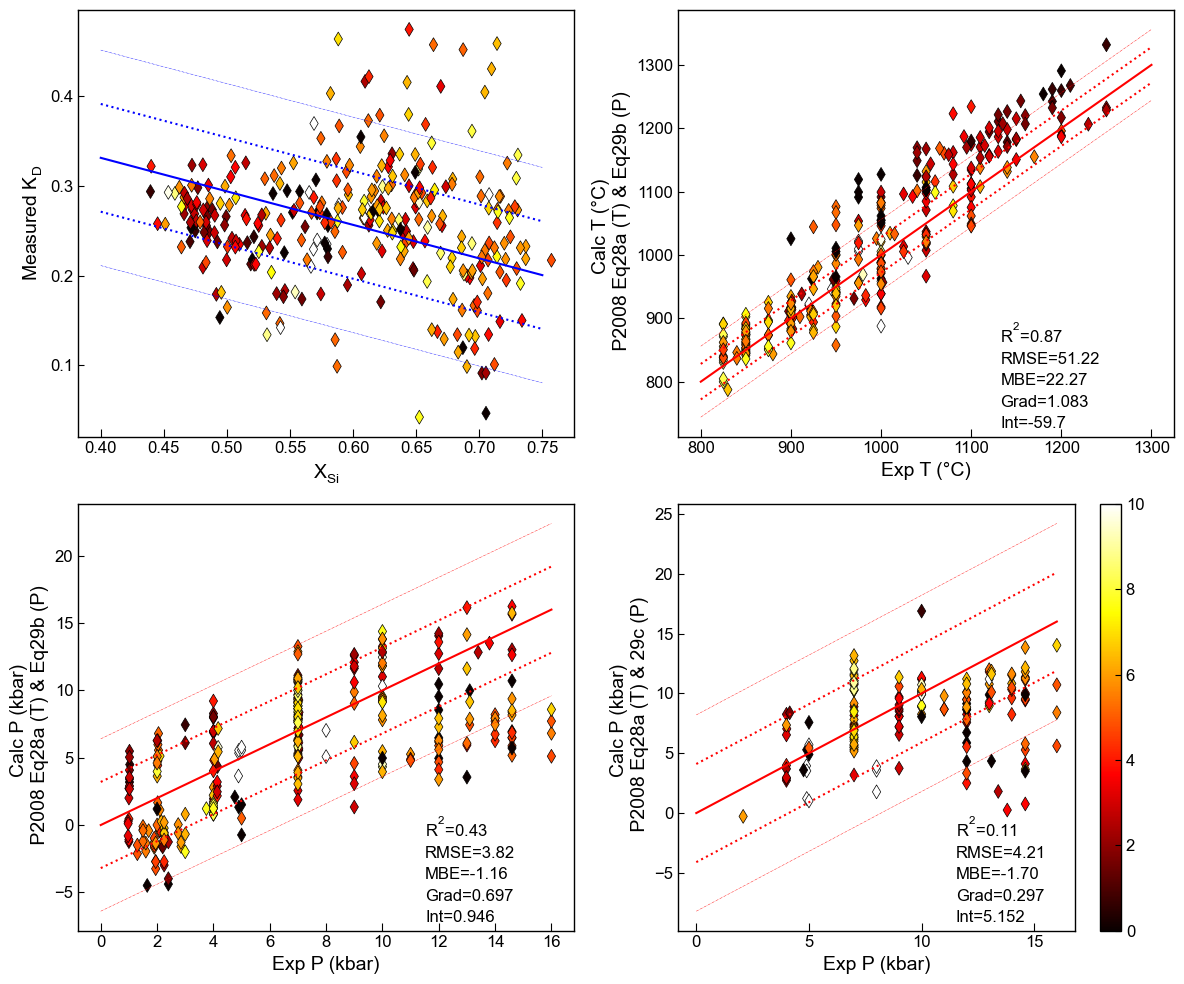

In [38]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure 

s=ax0.scatter(Eq_tests['Si_Liq_cat_frac'].loc[Press_new], 
         Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new], cmap='hot',
vmin = 0, vmax = 10)

# ax0.plot(Eq_tests['Si_Liq_cat_frac'].loc[Press_new], 
#          Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new], 'ok', mfc='white')
# ax0.plot(Eq_tests2['Si_Liq_cat_frac'].loc[Press_new2], 
#          Eq_tests2['Kd_Fe_Mg_Fet'].loc[Press_new2], 'ok', mfc='blue')

#ax0.plot(Eq_tests['Si_Liq_cat_frac'].loc[SomeFe3], Eq_tests['Kd_Fe_Mg_Fe2'].loc[SomeFe3], '.r', mfc='red')
linspace_Si=np.linspace(0.4, 0.75, 50)
Linspace_Kd=0.4805 - 0.3733 *linspace_Si
ax0.plot(linspace_Si, Linspace_Kd-0.06, ':b')
ax0.plot(linspace_Si, Linspace_Kd-0.12, '-.b', lw=0.3)
ax0.plot(linspace_Si, Linspace_Kd, '-b')
ax0.plot(linspace_Si, Linspace_Kd+0.06, ':b')
ax0.plot(linspace_Si, Linspace_Kd+0.12, '-.b', lw=0.3)
ax0.set_xlabel('X$_{Si}$')
ax0.set_ylabel('Measured K$_{D}$')


## Plotting temperature
# ax1.plot(Opx_Glass['T_K_x'].loc[Press_new]-273.15, 
#          Put_28a_GlobalP.loc[Press_new]-273.15, 'ok', mfc='white')
s=ax1.scatter(Opx_Glass['T_K_x'].loc[Press_new]-273.15, 
         Opx_only29b_with28a['T_K_calc'].loc[Press_new]-273.15, marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new], cmap='hot',
vmin = 0, vmax = 10)
#fig.colorbar(s, ax=ax1)
ax1.plot([800, 1300], [800, 1300], '-r')
ax1.plot([800, 1300], [800+28, 1300+28], ':r')
ax1.plot([800, 1300], [800-28, 1300-28], ':r')
ax1.plot([800, 1300], [800+2*28, 1300+2*28],  '-.r', lw=0.3)
ax1.plot([800, 1300], [800-2*28, 1300-2*28],  '-.r', lw=0.3)



Stats_28aGlob=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new]-273.15, 
         Opx_only29b_with28a['T_K_calc'].loc[Press_new]-273.15)

# ax1.annotate("Cpx Mg#>0.68", xy=(0.65, 0.24),
# xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_28aGlob['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_28aGlob['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MBE="+str(Stats_28aGlob['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_28aGlob['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_28aGlob['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=12)



#ax2.plot(Opx_Glass['P_kbar_x'].loc[Press_new], Out_Global_FixedT.loc[Press_new], 'ok', mfc='white')

s=ax2.scatter(Opx_Glass['P_kbar_x'].loc[Press_new], Opx_only29b_with28a['P_kbar_calc'].loc[Press_new],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new], cmap='hot',
vmin = 0, vmax = 10)
#fig.colorbar(s, ax=ax2)

ax2.plot([0, 16], [0, 16], '-r')
ax2.plot([0, 16], [0+3.2, 16+3.2], ':r')
ax2.plot([0, 16], [0-3.2, 16-3.2], ':r')
ax2.plot([0, 16], [0+2*3.2, 16+2*3.2], '-.r', lw=0.3)
ax2.plot([0, 16], [0-2*3.2, 16-2*3.2],  '-.r', lw=0.3)
stats_global=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new],
                             Opx_only29b_with28a['P_kbar_calc'].loc[Press_new])

xcord=0.7
ax2.annotate("R$^{2}$="+str(stats_global['R2']), xy=(xcord, 0.22),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(stats_global['RMSE']), xy=(xcord, 0.17),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MBE="+str(stats_global['Mean']), xy=(xcord, 0.12),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(stats_global['Grad'], 3))[1:6], xy=(xcord, 0.07),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(stats_global['Int'], 3))[1:6], xy=(xcord, 0.02),
xycoords="axes fraction", fontsize=12)

ax2.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Calc P (kbar) \n P2008 Eq28a (T) & Eq29b (P)')


############### Opx-only pressure
# ax3.plot(Opx_Glass['P_kbar_x'].loc[Press_new],
#          Opx_only29c_with28a['P_kbar_calc'].loc[Press_new], 'ok', mfc='white')

s=ax3.scatter(Opx_Glass['P_kbar_x'].loc[Press_new],
         Opx_only29c_with28a['P_kbar_calc'].loc[Press_new],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new], cmap='hot',
vmin = 0, vmax = 10)


ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) \n P2008 Eq28a (T) & Eq29b (P)')

ax3.set_xlabel('Exp P (kbar)')
ax3.set_ylabel('Calc P (kbar) \n P2008 Eq28a (T) & 29c (P)')


ax3.plot([0, 16], [0, 16], '-r')
ax3.plot([0, 16], [0+4.1, 16+4.1], ':r')
ax3.plot([0, 16], [0-4.1, 16-4.1], ':r')
ax3.plot([0, 16], [0+2*4.1, 16+2*4.1], '-.r', lw=0.3)
ax3.plot([0, 16], [0-2*4.1, 16-2*4.1],  '-.r', lw=0.3)


stats_opxonly=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new],
         Opx_only29c_with28a['P_kbar_calc'].loc[Press_new])

xcord=0.7
ax3.annotate("R$^{2}$="+str(stats_opxonly['R2']), xy=(xcord, 0.22),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(stats_opxonly['RMSE']), xy=(xcord, 0.17),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MBE="+str(stats_opxonly['Mean']), xy=(xcord, 0.12),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(np.round(stats_opxonly['Grad'], 3))[1:6], xy=(xcord, 0.07),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(np.round(stats_opxonly['Int'], 3))[1:6], xy=(xcord, 0.02),
xycoords="axes fraction", fontsize=12)

fig.colorbar(s, ax=ax3)
fig.tight_layout()
fig.savefig('Opx_Liq.png', dpi=200, transparent=True)

In [37]:
Opx_Glass['P_kbar_x'].loc[Press_new],
         Opx_only29c_with28a['P_kbar_calc'].loc[Press_new]

IndentationError: unexpected indent (475011323.py, line 2)